In [3]:
##Code created by Taylor Portwood
#import dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import gmaps

#read in CSV file for housing prices
home_df = pd.read_csv('Metro_Zhvi_AllHomes (1).csv')
#read in CSV for inflation rate
inflation_df = pd.read_csv('CPIAUCSL.csv')

#drop unnecessary columns
home_df.drop(["RegionID", "SizeRank"], axis = 1)
inflation_df

,DATE,CPIAUCSL
0,1/1/2015,234.718
1,2/1/2015,235.236
2,3/1/2015,236.005
3,4/1/2015,236.156
4,5/1/2015,236.974
5,6/1/2015,237.684
6,7/1/2015,238.053
7,8/1/2015,238.028
8,9/1/2015,237.506
9,10/1/2015,237.781


In [4]:
#we want to filter columns to be able to review relevant data in our dataframe. new_columns will store the columns we want
new_columns = []

#this loop goes through each month and year from 2015 to 2019 and adds it to the new_columns list
for i in range(2015, 2020):
    for j in range(1,13):
        if i == 2019 and j == 12:
            break
        if j < 10:
            new_columns.append(str(i) + '-0' + str(j))
        else:
            new_columns.append(str(i) + '-'+ str(j))

#specify that we only want to look at the data from the new_columns list (i.e., we are dropping the columns from before 2015)
home_df = home_df[new_columns]

#transpose data to make it easier to use in matplotlib
home_df = home_df.transpose()

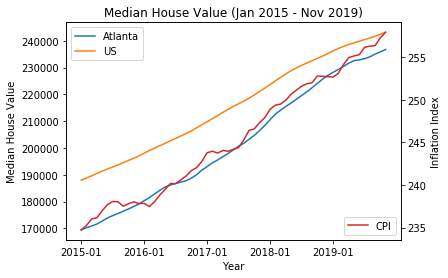

In [21]:
#plot home value vs. time for US and Atlanta
fig, ax1 = plt.subplots()
ax1.plot(home_df.index,home_df[home_df.columns[1]])
ax1.plot(home_df.index, home_df[home_df.columns[0]])


#Space out xticks so they are more readable
plt.xticks([0, 12, 24, 36, 48])
color = 'tab:red'
ax2 = ax1.twinx()
ax2.set_ylabel("Inflation Index")
ax2.plot(inflation_df.index, inflation_df[inflation_df.columns[1]], color=color)

#label x and y axes
ax1.set_xlabel("Year")
ax1.set_ylabel("Median House Value")

#add title to plot
plt.title("Median House Value (Jan 2015 - Nov 2019)")

#add legend to plot
ax1.legend(["Atlanta", "US"])
ax2.legend(["CPI"],loc= "lower right")

#save figure
plt.savefig("AtlantavsUS.png")

In [12]:
#home_df["Percent Change"] = home_df[""]
home_df["Percent Change_US"] = (home_df[0]["2019-11"] - home_df[0]["2015-01"]) / home_df[0]["2019-11"] * 100
home_df["Percent Change_Atlanta"] = (home_df[1]["2019-11"] - home_df[1]["2015-01"]) / home_df[1]["2019-11"] * 100

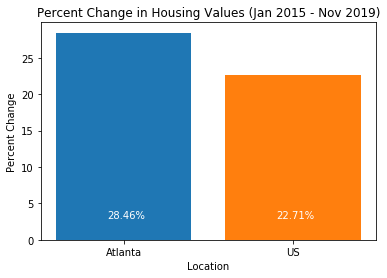

In [13]:
plt.bar(x="Atlanta", height = home_df["Percent Change_Atlanta"][1])
plt.bar(x="US", height = home_df["Percent Change_US"])
plt.xlabel("Location")
plt.ylabel("Percent Change")
plt.text(x=-0.1, y = 3, c="White", s="%.2f" %home_df["Percent Change_Atlanta"][1] + '%')
plt.text(x=0.9, y = 3, c="White", s="%.2f" %home_df["Percent Change_US"][1] + '%')
plt.title("Percent Change in Housing Values (Jan 2015 - Nov 2019)")
plt.savefig("AtlantavsUSBar.png")